In [58]:
import numpy as np
import sympy as sym
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import urllib.request as urll
import math as mt
#Algebra lineal
#3
def multiplicar_matrices(A, B):
    d = len(A)
    d1 = len(A[0])
    d2 = len(B[0])

    C = [[0 for _ in range(d1)] for _ in range(d)]
    
    for i in range(d):
        for j in range(d1):
            for k in range(d2):
                C[i][j] += A[i][k]* B[k][j]
    return C

A = [[1,0,0],
     [5,1,0],
     [-2,3,1]]
B = [[4,-2,1],
     [0,3,7],
     [0,0,2]]
C = multiplicar_matrices(A,B)
C

[[4, -2, 1], [20, -7, 12], [-8, 13, 21]]

In [45]:
#4
"""DOCUMENTO ADJUNTO A LA ENTREGA"""


'DOCUMENTO ADJUNTO A LA ENTREGA'


Documento:

https://drive.google.com/drive/folders/1VVhvI7W9itw8eTYfyLoklf8FQFmpoyDG?usp=sharing

In [46]:
#5
"""DOCUMENTO ADJUNTO A LA ENTREGA"""

'DOCUMENTO ADJUNTO A LA ENTREGA'

In [49]:
######################################################################
#6
# Define the system of equations
A = np.array([[3, -1, -1], [-1, 3, 1], [2, 1, 4]])
b = np.array([1, 3, 7])

# Define the SOR parameters
tol = 1e-6
max_iter = 1000
min_iter = np.inf
omega_min = 0.50
omega_max = 1.99
omega_step = 0.01

for omega in np.arange(omega_min, omega_max + omega_step, omega_step):
    k = 0
    err = np.inf
    
    A_int = np.array(A, dtype=np.int64)

    x = np.zeros_like(b)
    while err > tol and k < max_iter:
        x_old = x.copy()
        for i in range(len(b)):
            x1 = omega / np.int64(A_int[i, i])
            x11 = np.dot(A_int[i, :i], x[:i])
            x12 = np.dot(A_int[i, i+1:], x_old[i+1:])
            x13 = x11 - x12
            x2 = b[i] - x13
            x3 = x1*x2
            x4 = (1 - omega) * x_old[i]
            x[i] = x4 + x3
        error = np.linalg.norm(A @ x - b)
        err = np.max(np.abs(x - x_old))
        k += 1

    if k < min_iter:
        opt_omega = omega
        min_iter = k

print("Optimal relaxation parameter:", opt_omega)
print("Minimum number of iterations:", min_iter)

Optimal relaxation parameter: 0.5
Minimum number of iterations: 1


In [48]:
#7
def descomposicion_LU(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            total = 0
            for k in range(i):
                total += L[i][k]*U[k][j]
            U[i][j] = A[i][j] - total
        for j in range(i + 1, n):
            total2 = 0
            for k in range(i):
                total2 += L[j][k]*U[k][i]
            L[j][i] = (A[j][i]- total2)/U[i][i]
            
    return L, U
L, U = descomposicion_LU(C)
print(L, "\n", U)

[[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]] 
 [[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0.  2.]]


In [50]:
#9

def jacobi_rotation(A, tol=1e-6, max_iter=1000):
    n = len(A)
    values = np.diag(A)
    vectors = np.eye(n)

    converged = False
    iter_count = 0

    while not converged and iter_count < max_iter:
        max_off_diag = 0.0
        p = 0
        q = 0

        for i in range(n):
            for j in range(i + 1, n):
                if abs(A[i][j]) > max_off_diag:
                    max_off_diag = abs(A[i][j])
                    p = i
                    q = j

        if max_off_diag < tol:
            converged = True
            break

        if A[p][p] == A[q][q]:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan2(2*A[q][p], A[p][p] - A[q][q])

        c = np.cos(theta)
        s = np.sin(theta)
        R = np.eye(n)
        R[p][p] = c
        R[q][q] = c
        R[p][q] = -s
        R[q][p] = s
        A = R.T @ A @ R
        vectors = vectors @ R

        iter_count += 1

    values = np.diag(A)
    return values, vectors

A1 = np.array([[4, 1, 1],
              [1, 3, 2],
              [1, 2, 5]])

values, vectors = jacobi_rotation(A1)

print("Valores propios:", values, "Vectores propios:", vectors)

#b

g,h = np.linalg.eig(A1)
print(g)
print(h)

Valores propios: [6.89510652 3.39729507 1.70759841] Vectores propios: [[ 0.43170413 -0.88573564  0.17059871]
 [ 0.49725362  0.07589338 -0.86427949]
 [ 0.75257583  0.45794385  0.47319874]]
[6.89510652 3.39729507 1.70759841]
[[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


In [51]:
#10
def potencia_inversa(A, tol=1e-6, max_iter=100):
    n = len(A)
    v = np.random.rand(n)
    v /= np.linalg.norm(v)
    
    for i in range(max_iter):
        v_ant = v.copy()
        v = np.linalg.solve(A, v)
        v /= np.linalg.norm(v)
        E0 = np.dot(v, np.dot(A, v))
        if np.linalg.norm(v - v_ant) < tol:
            break
    
    return E0, -v

A = np.array([[1, 2, -1],
              [1, 0, 1],
              [4, -4, 5]])

E0, v = potencia_inversa(A)
print("Valor del estado base E0:")
print(E0)
print("Vector propio correspondiente:")
print(v)

Valor del estado base E0:
0.9999971704213447
Vector propio correspondiente:
[ 0.40824819 -0.40824882 -0.81649637]


In [52]:
################################################################################
#12
def jacobian(f, x, h=0.01):
    
    n = x.shape[0]
    m = f(x).shape[0]
    J = np.zeros((m, n))
    
    for i in range(n):
        # perturb the i-th input variable by h
        x_plus = x.copy()
        x_plus[i] += h
        x_minus = x.copy()
        x_minus[i] -= h
        
        # estimate the i-th column of the Jacobian using the central difference operator of order O(h^4)
        J[:, i] = (-f(x_plus) + 8*f(x_plus - h) - 8*f(x_minus + h) + f(x_minus)) / (12*h)
    
    return J

"""

b) Estime el Jacobiano de la función del problema anterior (5.70) en el punto x =   (0.5, 0.5,0.5) con h = 0.01

  b1) Definir la función del punto 11 AL, ecuación (5.70)

  """

def f(x,y,z):

    X = 6*x - 2*np.cos(y*z)
    Y = 9*y + mt.sqrt((x**2) + np.cos(z) + 1.06) + 0.9
    Z = 60*z + 3*np.exp(-x*y) + 10*np.pi - 3

    return (X,Y,Z)

F = f(0.5,0.5,0.5)




In [53]:
#13

J = [[[0,0,0], [0,0,-1], [0,1,0]], [[0,0,1], [0,0,0], [-1,0,0]], [[0,-1,0], [1,0,0], [0,0,0]]]

for i in range(3):
  for j in range(3):
      corchete = np.matmul(J[i],J[j]) - np.matmul(J[j],J[i])
      print(corchete, "para i:",i+1,", j:", j+1 , "\n")


[[0 0 0]
 [0 0 0]
 [0 0 0]] para i: 1 , j: 1 

[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  0]] para i: 1 , j: 2 

[[ 0  0 -1]
 [ 0  0  0]
 [ 1  0  0]] para i: 1 , j: 3 

[[ 0  1  0]
 [-1  0  0]
 [ 0  0  0]] para i: 2 , j: 1 

[[0 0 0]
 [0 0 0]
 [0 0 0]] para i: 2 , j: 2 

[[ 0  0  0]
 [ 0  0 -1]
 [ 0  1  0]] para i: 2 , j: 3 

[[ 0  0  1]
 [ 0  0  0]
 [-1  0  0]] para i: 3 , j: 1 

[[ 0  0  0]
 [ 0  0  1]
 [ 0 -1  0]] para i: 3 , j: 2 

[[0 0 0]
 [0 0 0]
 [0 0 0]] para i: 3 , j: 3 



Como se puede evidenciar en los resultados, cuando i=j el resultado es 0, cuando hay una permutación impar se multiplica por -1 la matriz $J_{k}$ para $k$ diferente a $i$ y $j$. Cuando hay una permutación par el resultado es $J_k$. Esto se resume como $[Ji,Jj] = \epsilon_{ijk}Jk$, siendo $\epsilon_{ijk} = 1$ si $(i,j,k) = (1, 2, 3),(2, 3, 1),(3, 1, 2)$, es decir, permutacion par. $\epsilon_{ijk} = -1$ si $(i,j,k) = (3, 2, 1),(1, 3, 2),(2, 1, 3)$, es decir, permutacion impar. $\epsilon_{ijk} = 0$ si hay una pareja igual entre i,j o k.

In [54]:
#14

J = [[[0,1], [1,0]], [[0,complex( 0, -1)], [complex(0,1),0]], [[1,0], [0, -1]]]
for i in range(3):
  for z in range(3):
      corchete = np.matmul(J[i],J[z]) - np.matmul(J[z],J[i])
      print(corchete, "para i:",i+1,", j:", z+1 , "\n")

[[0 0]
 [0 0]] para i: 1 , j: 1 

[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]] para i: 1 , j: 2 

[[ 0 -2]
 [ 2  0]] para i: 1 , j: 3 

[[0.-2.j 0.+0.j]
 [0.+0.j 0.+2.j]] para i: 2 , j: 1 

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]] para i: 2 , j: 2 

[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]] para i: 2 , j: 3 

[[ 0  2]
 [-2  0]] para i: 3 , j: 1 

[[0.+0.j 0.-2.j]
 [0.-2.j 0.+0.j]] para i: 3 , j: 2 

[[0 0]
 [0 0]] para i: 3 , j: 3 



De esta manera, igual que el punto anterior, $[Ji,Jj] = 2i\epsilon_{ijk}\sigma_k$, siendo $\epsilon_{ijk} = 1$ si $(i,j,k) = (1, 2, 3),(2, 3, 1),(3, 1, 2)$, es decir, permutacion par. $\epsilon_{ijk} = -1$ si $(i,j,k) = (3, 2, 1),(1, 3, 2),(2, 1, 3)$, es decir, permutacion impar. $\epsilon_{ijk} = 0$ si hay una pareja igual entre i,j o k. En este caso, se puede combrobar que todos los casos cumplen la condicion.



In [55]:
#15


J = [[[1,0,0,0], [0,1,0,0], [0,0,-1,0], [0,0,0,-1]],[[0,0,0,1], [0,0,1,0], [0,-1,0,0], [-1,0,0,0]], [[0,0,0, complex(0,-1)], [0,0,complex(0,1), 0], [0,complex(0,1), 0,0], [complex(0,-1), 0,0,0]], [[0,0,1,0], [0,0,0, -1], [-1,0,0,0], [0,1,0,0]]]
for i in range(4):
  for z in range(4):
      corchete = np.matmul(J[i],J[z]) + np.matmul(J[z],J[i])
      print(corchete, "para i:",i+1,", j:", z+1 , "\n")
      diag = [[1,0,0,0], [0,-1,0,0], [0,0,-1,0], [0,0,0,-1]]
      ident = [[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]
      comp = np.multiply(2*diag[i][z], ident)
      if comp.all() == corchete.all():
        print(comp, "Resultado esperado acertado\n")


[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]] para i: 1 , j: 1 

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]] Resultado esperado acertado

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] para i: 1 , j: 2 

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] Resultado esperado acertado

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]] para i: 1 , j: 3 

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] Resultado esperado acertado

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] para i: 1 , j: 4 

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] Resultado esperado acertado

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] para i: 2 , j: 1 

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] Resultado esperado acertado

[[-2  0  0  0]
 [ 0 -2  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -2]] para i: 2 , j: 2 

[[-2  0  0  0]
 [ 0 -2  0  0]
 [ 0  0 -2  0]
 [ 0  0  0 -2]] Resultado esperado acertado

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j

En el codigo se verifica y se evidencia que las relaciones mencionadas se cumplen.

Como en los puntos anteriores, los resultados cumplen las condiciones especificadas.

0.4285714285714286 1.4285714285714286
Lo que se quiere decir es que, en este caso, no hay un solo punto donde las tres rectas se crucen exactamente. En cambio, el método de mínimos cuadrados encuentra el punto que está más cercano a las tres rectas en términos de distancia, lo que puede interpretarse como una "mejor aproximación" de un punto común de las tres rectas.
Después de analizar los resultados obtenidos mediante el método del mínimo cuadrado y la búsqueda iterativa, se ha determinado que dicho punto es aquel que se encuentra a la menor distancia de los tres puntos evaluados. En consecuencia, podemos afirmar que ese el punto en cuestión es:  [0.42168675 1.42570281]


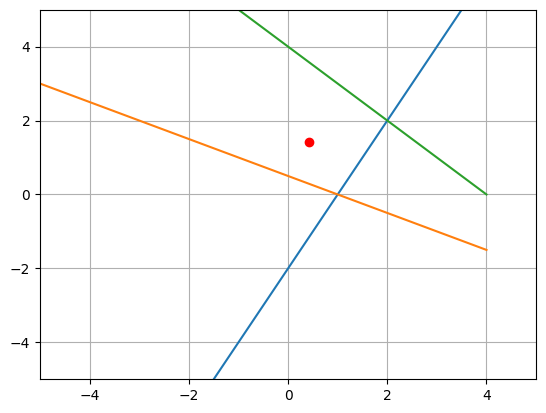

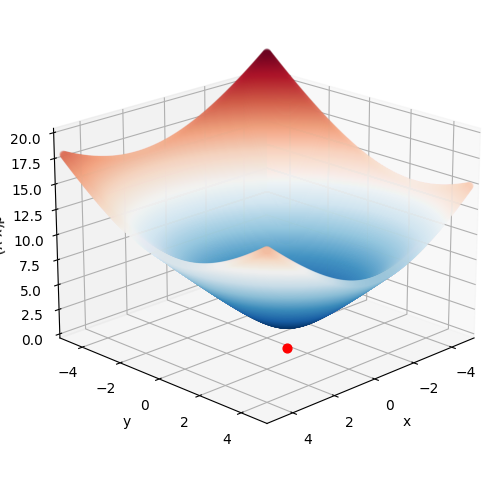

In [56]:
#Mínimos Cuadrados
#1
"""a) Mínimos cuadrados."""
def f1(x):
    return 2*x -2
def f2(x):
    return 1/2 - x/2
def f3(x):
    return 4 - x

#Se define la matriz basada en el sistema de ecuaciones
A = [[2,-1],
     [1,2],
     [1,1]]
#Se define el vector columna correspondiente al sistema de ecuaciones
b = [2,1,4]


A = np.array(A)
b = np.array(b)

AT = np.dot(A.T,A)
bT = np.dot(A.T,b)    
xsol = np.linalg.solve(AT,bT)
print(xsol[1],xsol[0])

x = range(-5,5)

plt.grid()
plt.plot(x,[f1(i) for i in x])
plt.plot(x,[f2(i) for i in x])
plt.plot(x,[f3(i) for i in x])
plt.scatter(xsol[1],xsol[0],color='r')
plt.xlim(-5,5)
plt.ylim(-5,5)
print('Lo que se quiere decir es que, en este caso, no hay un solo punto donde las tres rectas se crucen exactamente. En cambio, el método de mínimos cuadrados encuentra el punto que está más cercano a las tres rectas en términos de distancia, lo que puede interpretarse como una "mejor aproximación" de un punto común de las tres rectas.')

"""-------------------------------------------------"""

N=499
x=np.linspace(-5,5,N)
y=np.copy(x)

Puntos=np.zeros((N,N))
xx,yy=np.meshgrid(x,y)

for j in range(len(y)):
    for i in range(len(x)):   
        p=np.array([x[i],y[j]])
        Puntos[i,j]=np.linalg.norm(np.dot(A,p)-b)
        

Min=np.min(Puntos)

j,i=np.where(Puntos==Min)

P_minimo=np.array([float(x[i]),float(y[j])])

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111, projection = '3d')

ax1.set_xlim3d(-5, 5)
ax1.set_ylim3d(-5, 5)
ax1.set_zlim3d(0, 20)

ax1.set_zlabel("d(x,y)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.view_init(20, 45)

ax1.scatter(xx,yy,Puntos, c = Puntos, cmap= "RdBu_r",alpha=0.1)
ax1.scatter(P_minimo[0],P_minimo[1],color="r",s=40)

ax1.grid()

print('Después de analizar los resultados obtenidos mediante el método del mínimo cuadrado y la búsqueda iterativa, se ha determinado que dicho punto es aquel que se encuentra a la menor distancia de los tres puntos evaluados. En consecuencia, podemos afirmar que ese el punto en cuestión es: ',P_minimo)

In [ ]:
#6
"""DOCUMENTO ADJUNTO A LA ENTREGA"""   

'DOCUMENTO ADJUNTO A LA ENTREGA'

[1 1 1]
Entrenamiento en curso...
 Máximo de iteraciones alcanzado  0.045898487738870064
parámetros:  [4.35688088 0.96529898 2.79303697]


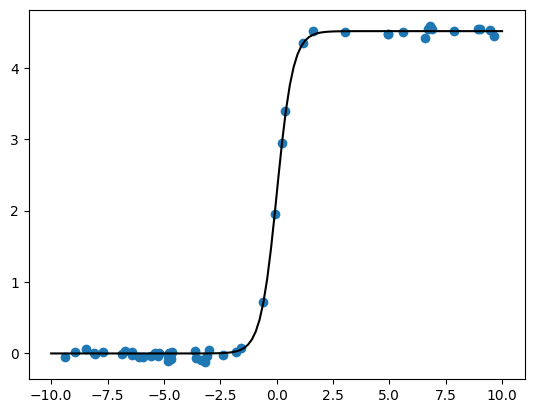

In [57]:
#7
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
data = np.loadtxt(url,dtype=float,delimiter=",",skiprows=1)

x = data[:,0]
y = data[:,1]
N = len(x)

"""
a) Defina el modelo de ajuste
"""

def M(x,p):
    return p[0]/(p[1]+np.exp(-p[2]*x))

"""
b)Defina la métrica (función de costo) a minimizar
"""

def X2(p,x,y):
    term= y-M(x,p)
    return np.sum(term**2)

"""
c y d) LA PARTE ANALÍTICA ESTÁ EN UN DOCUMENTO ADJUNTO A LA ENTREGA
"""
"""
e) Use una taza de aprendizaje γ = 1 × 10^−3 o γ = 5 × 10^−4,~θ0 = [1, 1, 1], un error de parada = 0.01 y un máximo de iteraciones de 1 × 10^4
"""

par0=np.array([1,1,1])
print(par0)

def GetGrad(M,p,x,h=1e-6):
    
    dim=len(p)
    J = np.zeros(dim)
    
    for j in range(dim):
        h_=np.zeros(dim)
        
        h_[j]=h
           
        J[j] = (  M(x,p+h_) - M(x,p-h_) )/(2*h)

    return J

def DescGrad(M,p,x,y,lr=1e-3,epochs=int(1e4),error=1e-2):
    
    d = 1
    it = 0
    
    print("Entrenamiento en curso...")

    while d > error and it < epochs:
        
        CurrentMe = X2(p,x,y)
        Sum=0
        
        #Machine Learning
        for i in range(len(y)):
            Sum += (y[i]-M(x[i],p))*GetGrad(M,p,x[i])
            
        p = p - lr*(-2)*Sum
        
        NewMe = X2(p,x,y)

        d= np.abs(CurrentMe-NewMe)/NewMe
        d=np.sqrt(NewMe/len(y))
  
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Máximo de iteraciones alcanzado ',d)
        
    return p,it

par,num_it=DescGrad(M,par0,x,y)
print("parámetros: ",par)

"""
f) Grafique los datos y the best fit model con sus parámetros.
"""

X=np.linspace(-10,10,120)
plt.scatter(x,y)
plt.plot(X,M(X,par),color="k")
plt.show()